In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Array
import numpy as np

# Dataframe
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,cross_val_predict

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# DL model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

#Model Evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

#Pipeline
from sklearn.pipeline import Pipeline

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
hotel_c=pd.read_csv("./Hotel Reservations.csv")

# Data Copy
hotel=hotel_c.copy()

# Data
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Data Info
hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
#Null Values
hotel.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
cat=hotel.select_dtypes(exclude=[np.number])

for i in cat.columns:
    hotel[i]=hotel[i].astype('category')

# Data Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

In [ ]:
hotel.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
# Data Labelencoding
for i in cat.columns:
    hotel[i+"_encoder"]=LabelEncoder().fit_transform(hotel[i])

# Taking numerical values
num=hotel.select_dtypes(include=[np.number])

#Selecting features & target variable
x=num.drop('booking_status_encoder',axis=1)
y=num['booking_status_encoder']

#Data Scaling
x=pd.DataFrame(RobustScaler().fit_transform(x.to_numpy()),columns=x.columns)

#Scaled data
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_ID_encoder,type_of_meal_plan_encoder,room_type_reserved_encoder,market_segment_type_encoder
0,0.0,0.0,0.0,0.0,0.0,1.532110,-1.0,0.4,-0.933333,0.0,0.0,0.0,-0.867758,0.0,-1.000000,0.0,0.0,-1.0
1,0.0,0.0,0.5,0.5,0.0,-0.477064,0.0,0.6,-0.666667,0.0,0.0,0.0,0.182116,1.0,-0.999945,3.0,0.0,0.0
2,-1.0,0.0,0.5,-0.5,0.0,-0.513761,0.0,-1.2,0.800000,0.0,0.0,0.0,-0.993703,0.0,-0.999890,0.0,0.0,0.0
3,0.0,0.0,-0.5,0.0,0.0,1.412844,0.0,-0.6,0.266667,0.0,0.0,0.0,0.013854,0.0,-0.999835,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.5,0.0,-0.082569,0.0,-0.8,-0.333333,0.0,0.0,0.0,-0.124685,0.0,-0.999779,3.0,0.0,0.0


In [ ]:
data=x.join(y)

# Final scaled Data
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_ID_encoder,type_of_meal_plan_encoder,room_type_reserved_encoder,market_segment_type_encoder,booking_status_encoder
0,0.0,0.0,0.0,0.0,0.0,1.532110,-1.0,0.4,-0.933333,0.0,0.0,0.0,-0.867758,0.0,-1.000000,0.0,0.0,-1.0,1
1,0.0,0.0,0.5,0.5,0.0,-0.477064,0.0,0.6,-0.666667,0.0,0.0,0.0,0.182116,1.0,-0.999945,3.0,0.0,0.0,1
2,-1.0,0.0,0.5,-0.5,0.0,-0.513761,0.0,-1.2,0.800000,0.0,0.0,0.0,-0.993703,0.0,-0.999890,0.0,0.0,0.0,0
3,0.0,0.0,-0.5,0.0,0.0,1.412844,0.0,-0.6,0.266667,0.0,0.0,0.0,0.013854,0.0,-0.999835,0.0,0.0,0.0,0
4,0.0,0.0,0.0,-0.5,0.0,-0.082569,0.0,-0.8,-0.333333,0.0,0.0,0.0,-0.124685,0.0,-0.999779,3.0,0.0,0.0,0


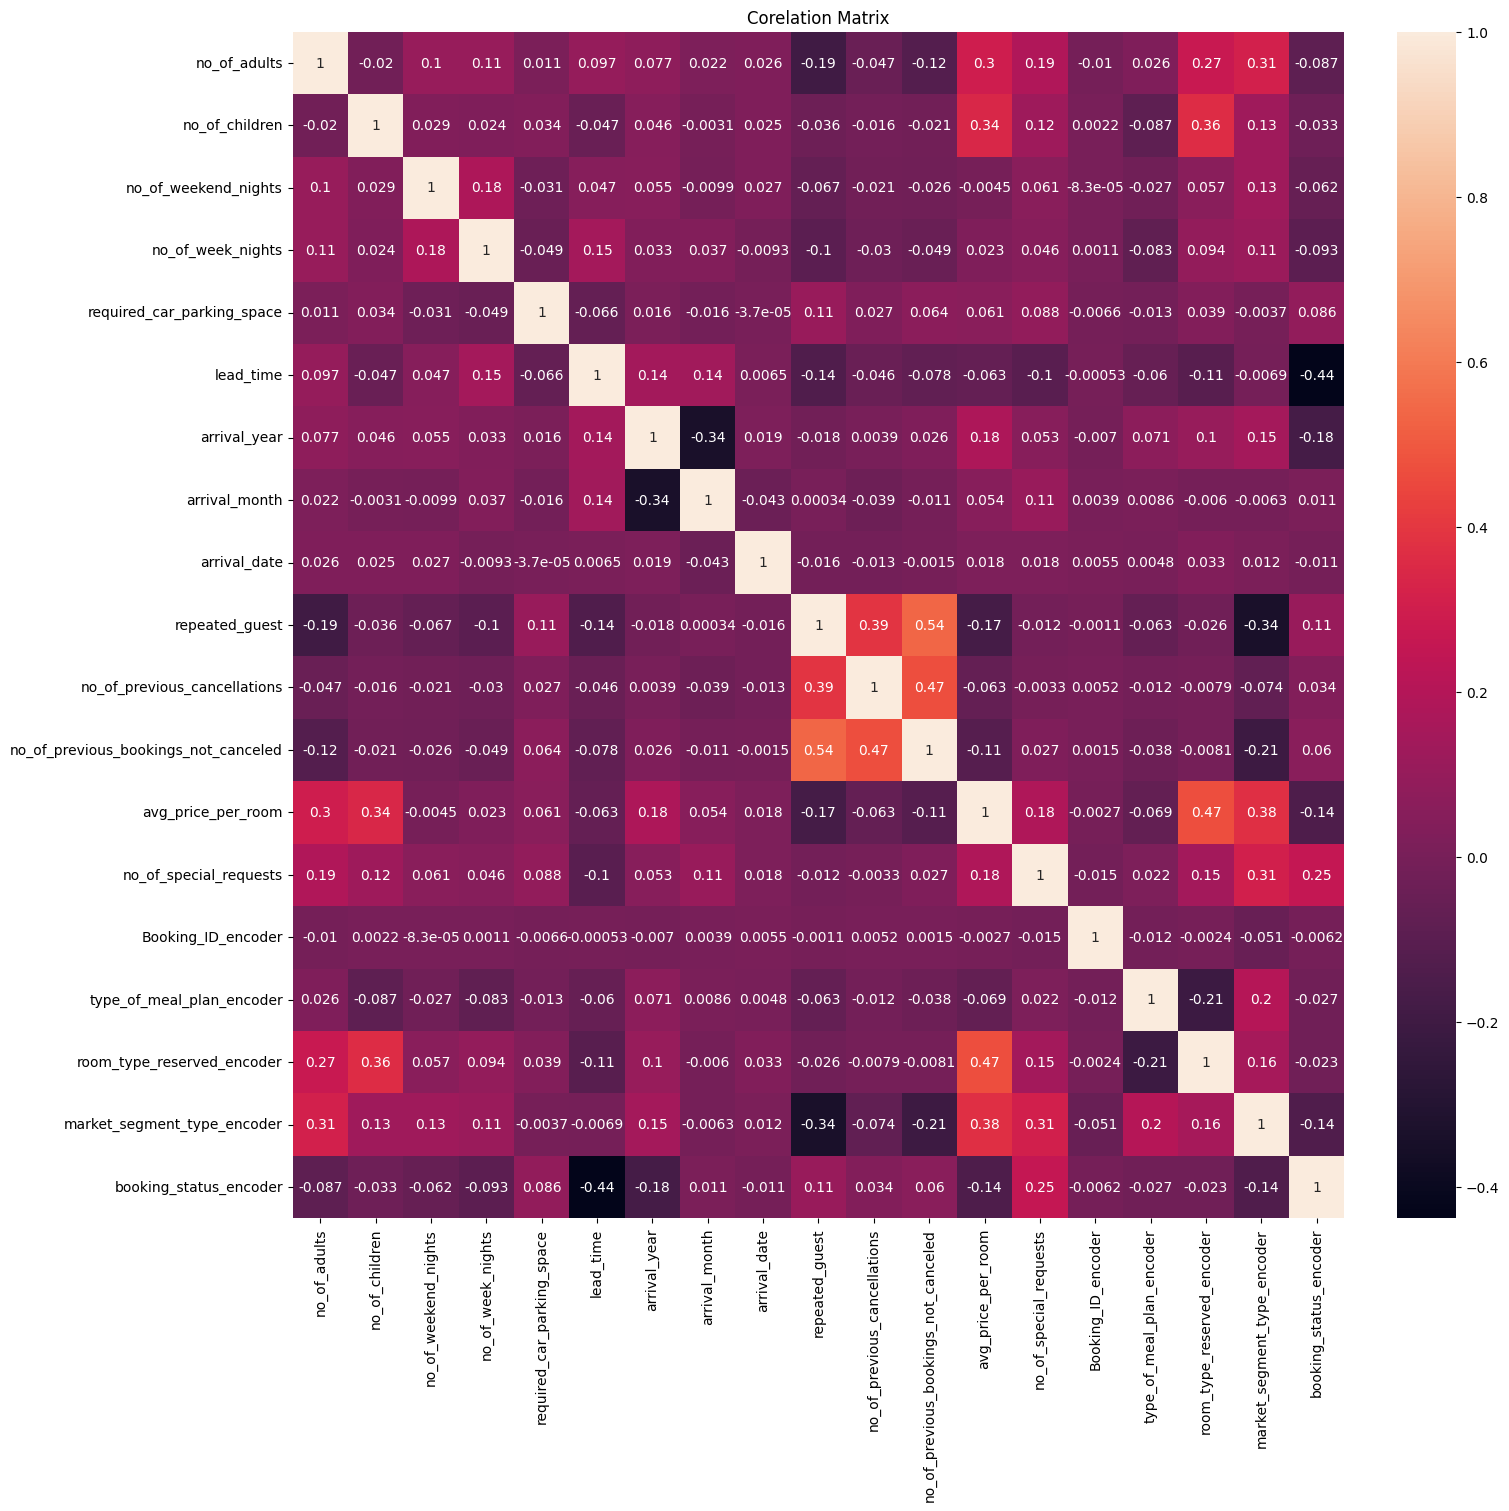

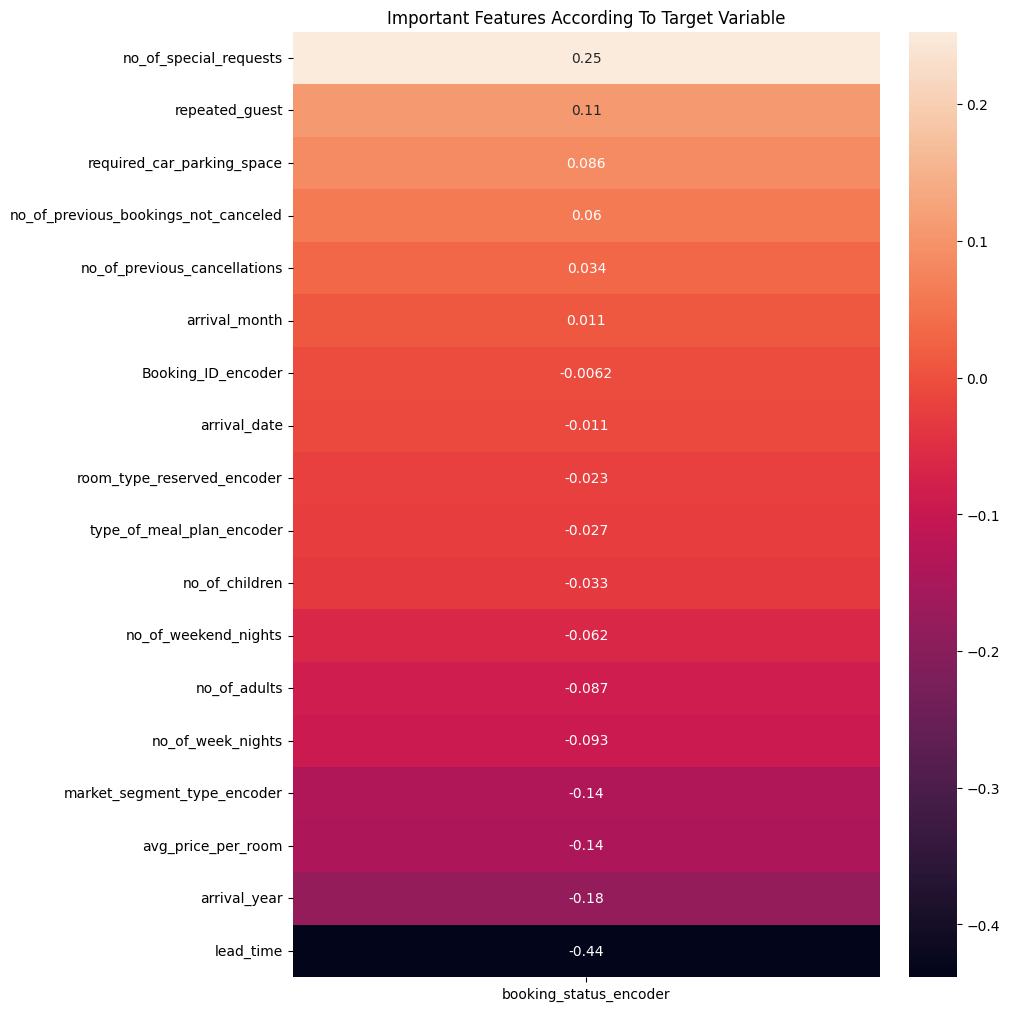

In [ ]:
# Data Spliting into training & testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
mdl_lr(x_train,x_test,y_train,y_test)
mdl_nb(x_train,x_test,y_train,y_test)
mdl_rf(x_train,x_test,y_train,y_test)
mdl_xgb(x_train,x_test,y_train,y_test)

***********Logistic Regression**************


Training Accuracy :  0.805765595463138
Testing Accuracy :  0.8074979325553616
F1 Score :  0.8625959205089525


Confusion Matrix :
 [[2212 1395]
 [ 700 6576]]
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.61      0.68      3607
           1       0.82      0.90      0.86      7276

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



***********Gaussian Naive Bayes**************


Training Accuracy :  0.44068998109640833
Testing Accuracy :  0.4427088119084811
F1 Score :  0.3000577034045009


Confusion Matrix :
 [[3518   89]
 [5976 1300]]
Classification Report :
               precision    recall  f1-score   support

           0       0.37      0.98      0.54      3607
           1       0.94      0.18      0.30      7276

    accuracy                           0.44 

In [ ]:
# MOdel Evaluation Tabular Format
tbl=pd.DataFrame()
tbl['Model']=['Logistic Regression','Naive Bayes','Random Forest']
tbl['Training Accuracy']=[acc_trn_lr,acc_trn_nb,acc_trn_rf]
tbl['Testing Accuracy']=[acc_lr,acc_nb,acc_rf]
tbl['F1 Score']=[f1_lr,f1_nb,f1_rf]

tbl.sort_values('F1 Score',ascending=False,ignore_index=True)

,Model,Training Accuracy,Testing Accuracy,F1 Score
0,Random Forest,1.000000,0.899936,0.926810
1,Logistic Regression,0.805766,0.807498,0.862596
2,Naive Bayes,0.440690,0.442709,0.300058




LogisticRegression()
Training Accuracy:  0.8056866922087498
Testing Accuracy:  0.8056868304977945


GaussianNB()
Training Accuracy:  0.4400990463322281
Testing Accuracy:  0.4400992438563327


RandomForestClassifier(random_state=10)
Training Accuracy:  0.8942576608219512
Testing Accuracy:  0.894258034026465


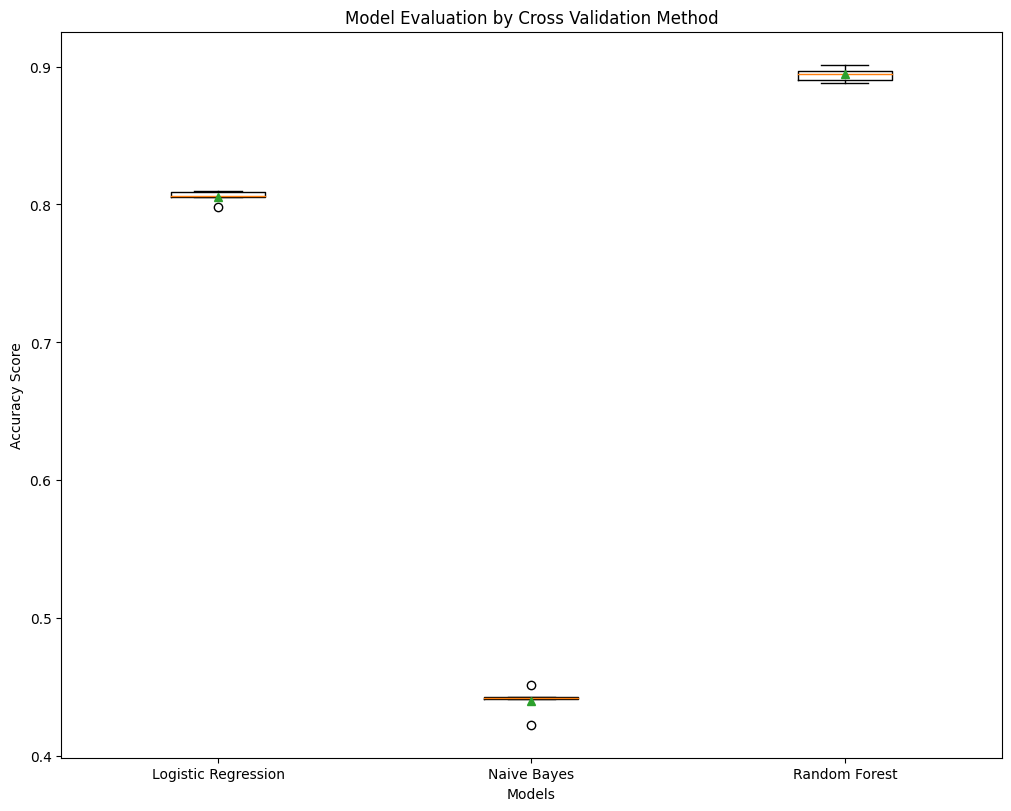

In [ ]:
# Applying Cross Validation to Avoid Overfitting - Accuracy Score
lr=LogisticRegression()
nb=GaussianNB()
rf=RandomForestClassifier(random_state=10)

result=[]

m=[lr,nb,rf]
mdl_name=['Logistic Regression','Naive Bayes','Random Forest']

def mdl(model):
    print("\n")
    print(i)
    pipe=Pipeline([('model',model)])
    pipe.fit(x_train,y_train)
    cv=StratifiedKFold(n_splits=5)
    scr=cross_val_score(pipe,x_train,y_train,cv=cv,scoring='accuracy',n_jobs=-1)
    result.append(scr)
    y_pred=cross_val_predict(model,x_train,y_train,cv=cv)
    acc=accuracy_score(y_train,y_pred)
    print("Training Accuracy: ",np.mean(scr))
    print("Testing Accuracy: ",acc)

for i in m:
    mdl(i)

plt.figure(figsize=(10,8),layout='constrained')
plt.title('Model Evaluation by Cross Validation Method')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.boxplot(result,labels=mdl_name,showmeans=True)
plt.show()

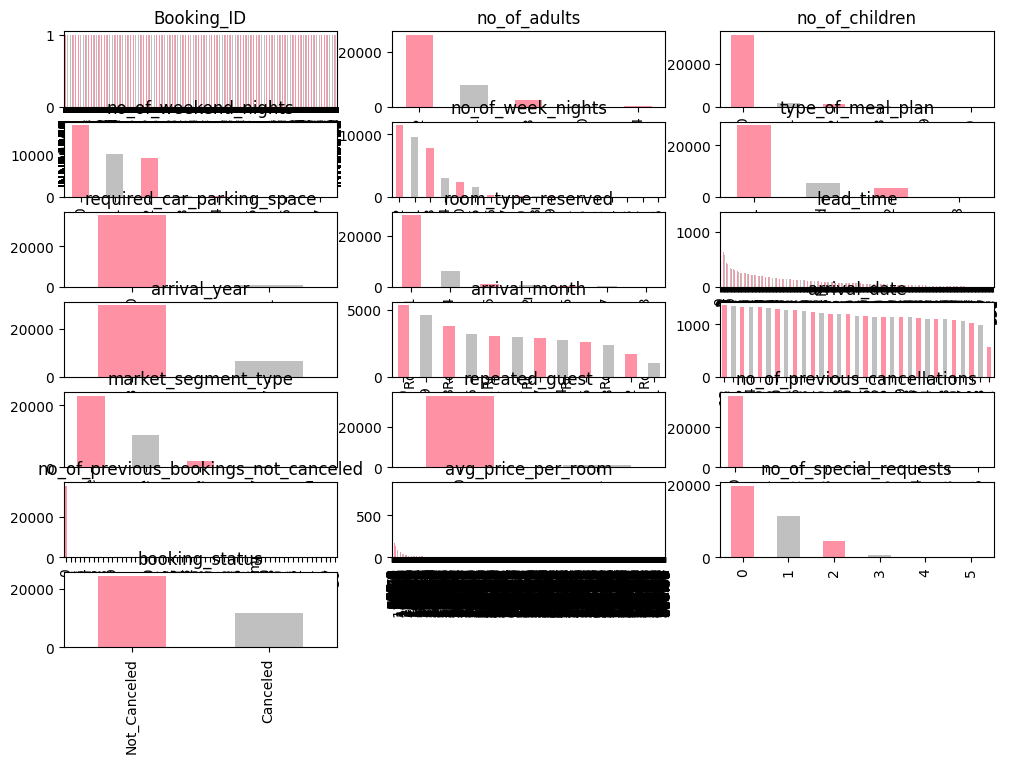

In [ ]:
# Trực quan hóa dữ liệu
num_sut = 3
num_sat = len(hotel.columns) // num_sut + (len(hotel.columns) % num_sut > 0)
renkler=['#FF91A4','#C0C0C0']
fig, eksn = plt.subplots(num_sat, num_sut, figsize=(12, 8))
# Sử dụng value_counts() để đếm số lần xuất hiện của mỗi giá trị trong cột và vẽ bar chat
for i, column in enumerate(hotel.columns):
    ax = eksn[i // num_sut, i % num_sut]
    hotel[column].value_counts().plot(kind='bar', ax=ax, color=renkler)
    ax.set_title(f'{column}')

# nếu có dư số cột sau khi vòng lặp đã chạy xong, các cột đó sẽ bị gỡ bỏ (delaxes)
for i in range(len(hotel.columns), num_sut * num_sat):
    fig.delaxes(eksn[i // num_sut, i % num_sut])

plt.tight_layout()
plt.show()



LogisticRegression()
Training F1:  0.8004458113044443
Testing F1:  0.861575580742902


GaussianNB()
Training F1:  0.376728374051448
Testing F1:  0.30154753131908624


RandomForestClassifier(random_state=10)
Training F1:  0.892934083965164
Testing F1:  0.9231781637149152


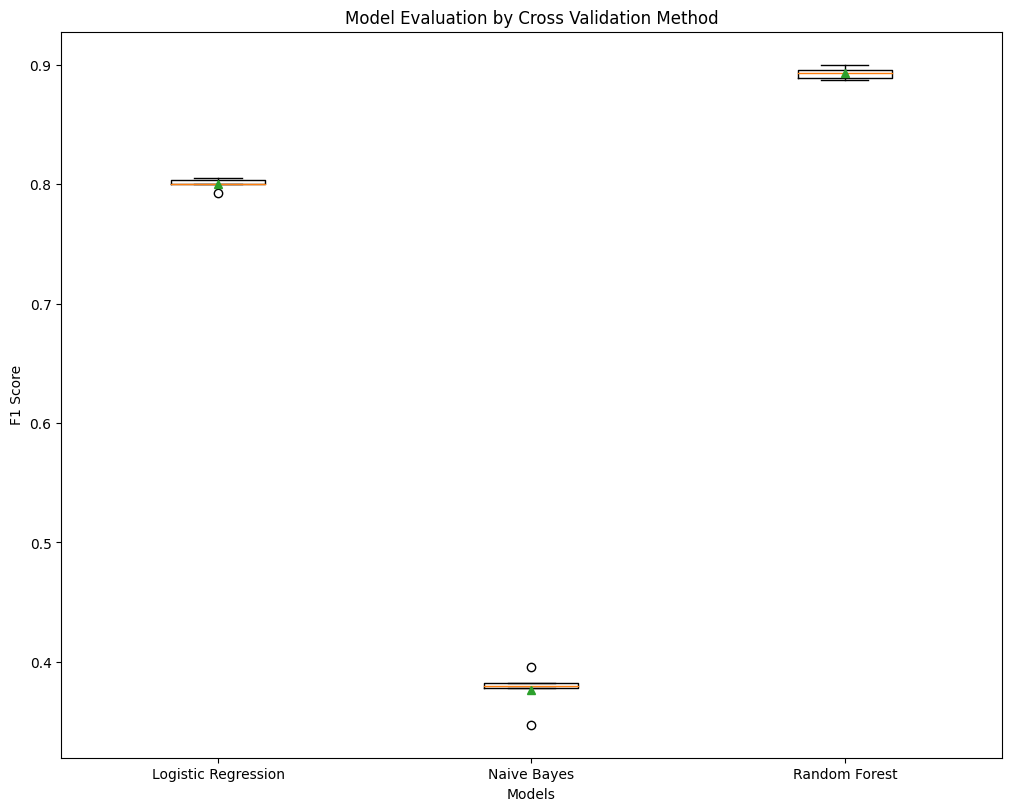

In [ ]:
# Applying Cross Validation to Avoid Overfitting - F1 Score
lr=LogisticRegression()
nb=GaussianNB()
rf=RandomForestClassifier(random_state=10)

result=[]

m=[lr,nb,rf]
mdl_name=['Logistic Regression','Naive Bayes','Random Forest']

def mdl(model):
    print("\n")
    print(i)
    pipe=Pipeline([('model',model)])
    pipe.fit(x_train,y_train)
    cv=StratifiedKFold(n_splits=5)
    scr=cross_val_score(pipe,x_train,y_train,cv=cv,scoring='f1_weighted',n_jobs=-1)
    result.append(scr)
    y_pred=cross_val_predict(model,x_train,y_train,cv=cv)
    f1=f1_score(y_train,y_pred)
    print("Training F1: ",np.mean(scr))
    print("Testing F1: ",f1)

for i in m:
    mdl(i)

plt.figure(figsize=(10,8),layout='constrained')
plt.title('Model Evaluation by Cross Validation Method')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.boxplot(result,labels=mdl_name,showmeans=True)
plt.show()

In [ ]:
# DL Model
dl_model = Sequential([keras.layers.Dense(256, activation = "relu",input_shape = [18]),
                       keras.layers.Dropout(0.3),
                       keras.layers.Dense(256, activation = "relu"),
                       keras.layers.Dropout(0.3),
                       keras.layers.Dense(256, activation = "relu"),
                       keras.layers.Dropout(0.3),
                       keras.layers.Dense(1, activation="sigmoid")])

# Model Compilation
dl_model.compile(optimizer='Adam',loss='binary_crossentropy', metrics = ['accuracy'])

# Model Fit
result=dl_model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    batch_size=256,
                    epochs=500)

Epoch 1/500
100/100 [==============================] - 3s 21ms/step - loss: 0.4667 - accuracy: 0.7782 - val_loss: 0.4092 - val_accuracy: 0.8186
Epoch 2/500
100/100 [==============================] - 2s 17ms/step - loss: 0.4149 - accuracy: 0.8131 - val_loss: 0.3930 - val_accuracy: 0.8220
Epoch 3/500
100/100 [==============================] - 1s 13ms/step - loss: 0.3977 - accuracy: 0.8211 - val_loss: 0.3821 - val_accuracy: 0.8264
Epoch 4/500
100/100 [==============================] - 1s 12ms/step - loss: 0.3875 - accuracy: 0.8264 - val_loss: 0.3698 - val_accuracy: 0.8330
Epoch 5/500
100/100 [==============================] - 1s 12ms/step - loss: 0.3770 - accuracy: 0.8301 - val_loss: 0.3586 - val_accuracy: 0.8380
Epoch 6/500
100/100 [==============================] - 1s 11ms/step - loss: 0.3704 - accuracy: 0.8335 - val_loss: 0.3562 - val_accuracy: 0.8409
Epoch 7/500
100/100 [==============================] - 1s 11ms/step - loss: 0.3627 - accuracy: 0.8386 - val_loss: 0.3508 - val_accuracy:

In [ ]:
# Model Evaluation
dl_eval=dl_model.evaluate(x,y)
print("\n")
print("***************Deep Learning Model Evaluation******************")
print("\n")
print("Accuracy : ",dl_eval[1])
print("Loss : ",dl_eval[0])

1134/1134 [==============================] - 3s 3ms/step - loss: 0.1679 - accuracy: 0.9424


***************Deep Learning Model Evaluation******************


Accuracy :  0.9424396753311157
Loss :  0.16786418855190277
